In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Data Collection

In [ ]:
import requests

# URLs of the files
data_url = 'https://www.raphaelcousin.com/modules/module5/course/module5_course_handle_inconsistencies.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data, 'module5_course_handle_inconsistencies.csv')

In [2]:
df = pd.read_csv('module5_course_handle_inconsistencies.csv')

In [3]:
df

,State,Country,Age,Date
0,england,UK,56.0,01-02-24
1,England,UK,69.0,07-01-23
2,england,UK,35.0,04-04-23
3,England,UK,60.0,2023-12-21
4,England,UK,54.0,10/14/2023
...,...,...,...,...
24022,South Carolina,USA,42.0,"March 08, 2023"
24023,Berlin,Germany,32.0,12/14/2023
24024,New South Wales,Australia,62.0,10/16/2023
24025,england,UK,69.0,"August 05, 2023"


## Data Cleaning - Handle Inconsistencies

In [4]:
from datetime import datetime
def standardize_date(date_str):
    if pd.isnull(date_str):
        return np.nan
    
    date_str = str(date_str).strip()
    date_str = str(date_str).replace('\r','')
    date_str = str(date_str).replace('\n','')
    date_str = str(date_str).replace('\t','')

    # Be aware:
    # 1. Ambiguity: Formats like %m/%d/%Y and %d/%m/%Y can lead to ambiguity 
    #    (e.g., 01/02/2023 could be Jan 2 or Feb 1).
    # 2. Consistency: The order of formats matters. Earlier matches take precedence.
    # 3. Locale influence: Some formats (%b, %B) may depend on the system's locale settings.
    # 4. Two-digit years: Formats with %y need smart century inference.
    # 5. Performance: Trying multiple formats can be slow for large datasets.
    #
    # How to manage:
    # 1. Know your data: Understand the expected date formats in your dataset.
    # 2. Prioritize formats: Order from most to least common in your data.
    # 3. Use locale-aware parsing for month names if dealing with international data.
    # 4. Implement custom logic for ambiguous cases (e.g., prefer US format if data is US-centric).
    # 5. Add logging or error tracking to identify problematic date strings.
    # 6. Consider using dateutil.parser for more flexible parsing, but be cautious of reduced control.
    # 7. For two-digit years, implement a sliding window approach for century inference.
    # 8. For critical applications, consider asking for user input on ambiguous dates.
    #
    # Remember: Date parsing is complex. Always validate your results and handle exceptions gracefully.
        
    date_formats = [
        '%Y-%m-%d',  # 2023-10-14
        '%Y/%m/%d',  # 2023/10/14
        '%d %b %Y',  # 14 Oct 2023
    ]

    
    for date_format in date_formats:
        try:
            dt = datetime.strptime(date_str, date_format)
            return dt.strftime('%Y-%m-%d')
        except ValueError as e:
            pass
    
    return np.nan

1. Initial Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24027 entries, 0 to 24026
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    24027 non-null  object
 1   Country  24027 non-null  object
 2   Age      24027 non-null  object
 3   Date     24027 non-null  object
dtypes: object(4)
memory usage: 751.0+ KB
None

Missing values:
State      0
Country    0
Age        0
Date       0
dtype: int64

2. State Analysis
Unique State values: 215

Sample of State values:
5069         Connecticut
830              england
7772         connecticut
18622    New South Wales
4213         Connecticut
9991         Connecticut
15347            England
6793         Connecticut
5554         Connecticut
18003            England
Name: State, dtype: object


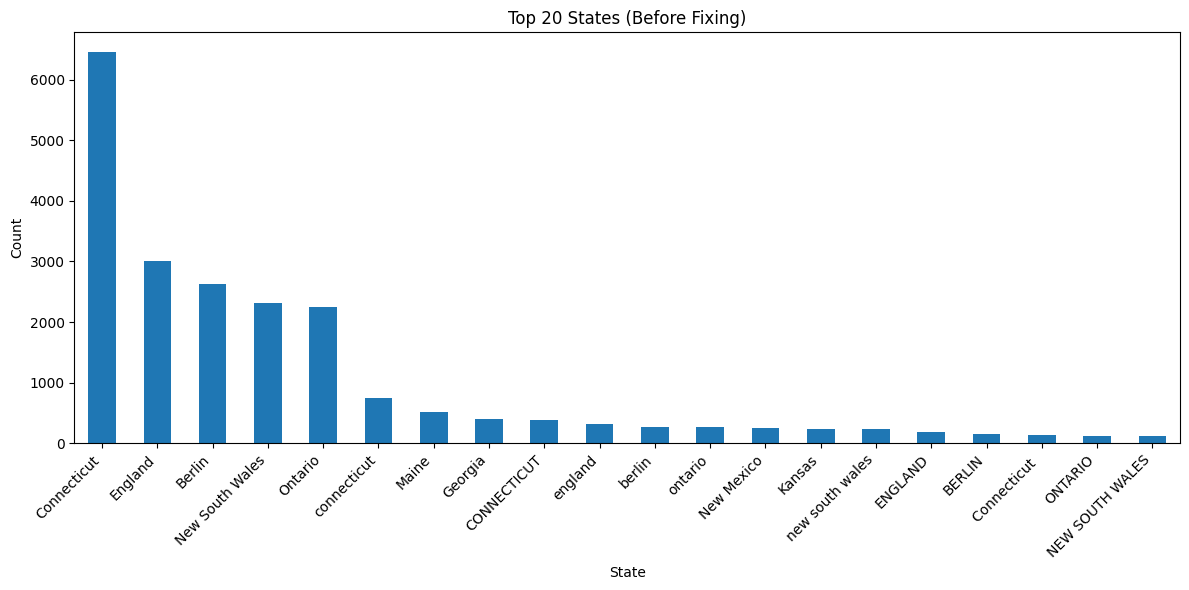


After fixing, unique State values: 54

Sample of fixed State values:
2782           Louisiana
9440         Connecticut
8796         Connecticut
16756            Georgia
5306         Connecticut
19522            England
8075         Connecticut
22181             Nevada
5819         Connecticut
1640     New South Wales
Name: State, dtype: object


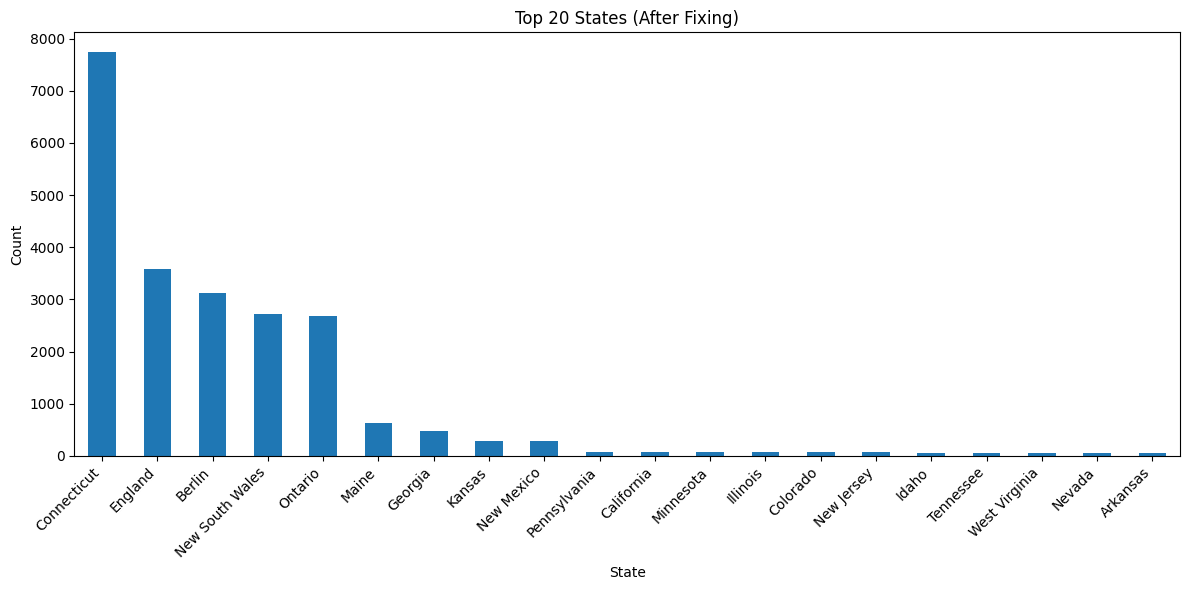


3. Country Analysis
Unique Country values: 26

Sample of Country values:
7562           USA
1872           USA
6701           USA
14287           UK
2445       Germany
21269      Germany
6373           USA
3180     Australia
10519          USA
5437           USA
Name: Country, dtype: object


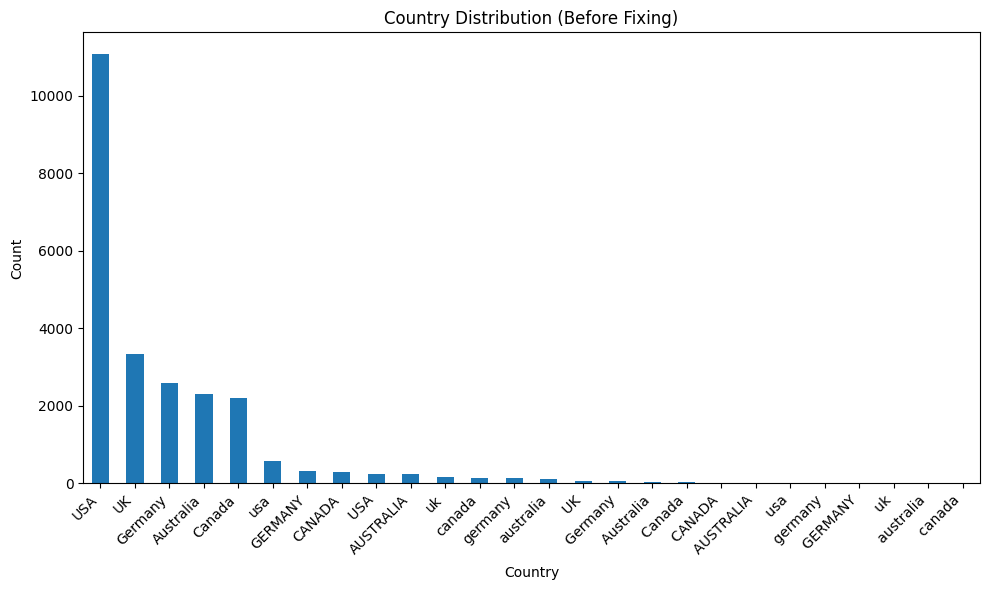


After fixing, unique Country values: 5

Sample of fixed Country values:
8731           Usa
16890          Usa
13525    Australia
23309          Usa
11834      Germany
3744     Australia
22608           Uk
4759           Usa
13308    Australia
23188      Germany
Name: Country, dtype: object


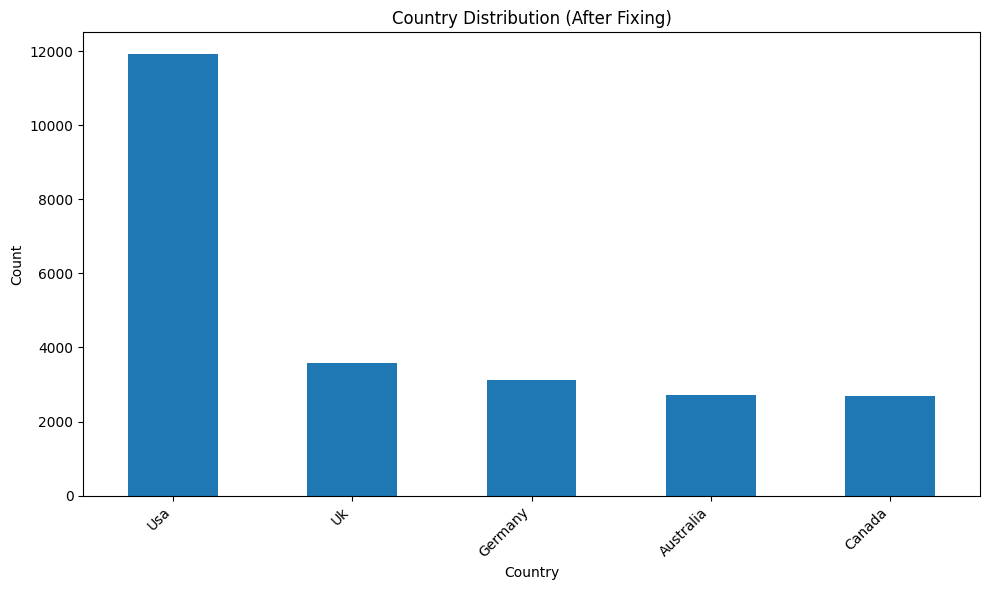


4. Age Analysis
Age data types:
Age
<class 'str'>    24027
Name: count, dtype: int64

Sample of Age values:
6653           34.0
9837           34.0
18520          42.0
5267           34.0
8954           34.0
12940          18.0
11903    34.0 years
21324          25.0
3824           20.0
1965           22.0
Name: Age, dtype: object

4. Age Analysis
Age data types:
Age
<class 'str'>    24027
Name: count, dtype: int64

Sample of Age values:
7273     34.0
6547     34.0
16782    23.0
18706    70.0
11010    34.0
3555     20.0
15268    46.0
15448    55.0
16334    26.0
8283     34.0
Name: Age, dtype: object


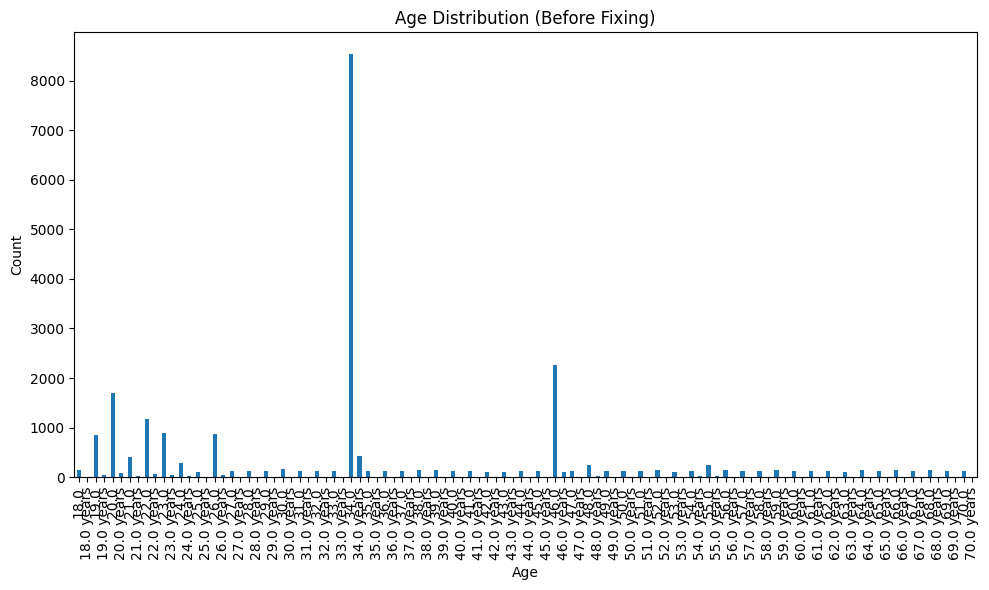


After fixing, Age data types:
Age
<class 'float'>    24027
Name: count, dtype: int64

Sample of fixed Age values:
17560    56.0
20745    56.0
20700    40.0
2631     20.0
11257    34.0
12684    34.0
9010     34.0
11315    34.0
20292    46.0
11145    34.0
Name: Age, dtype: float64


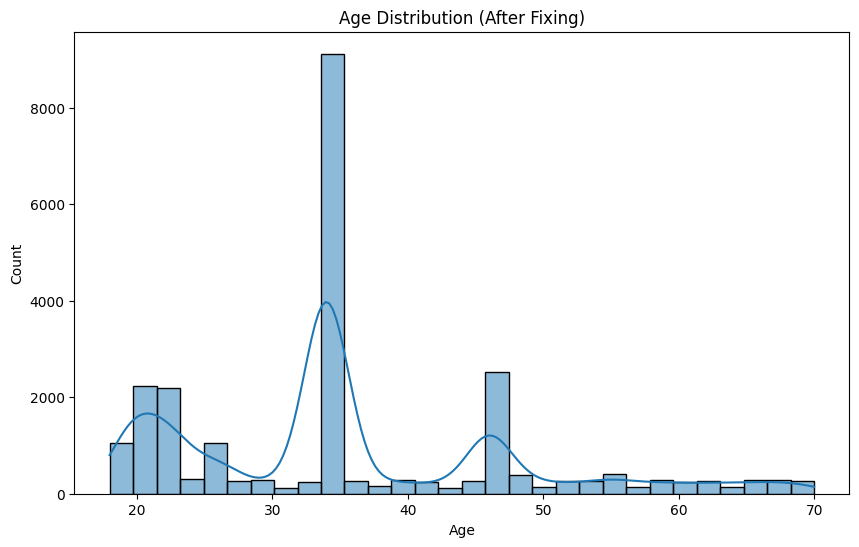


Age statistics:
count    24027.000000
mean        35.410372
std         12.272540
min         18.000000
25%         26.000000
50%         34.000000
75%         44.000000
max         70.000000
Name: Age, dtype: float64

5. Date Analysis
Date data types:
Date
<class 'str'>    24027
Name: count, dtype: int64

Sample of Date values:
9345              4/15/2023
22907              11-04-23
17848             7/22/2023
5963     September 16, 2023
22846              12-12-23
22807              09-04-23
17969              06-10-23
4081        August 29, 2023
10249     February 04, 2024
3183               02-12-24
Name: Date, dtype: object


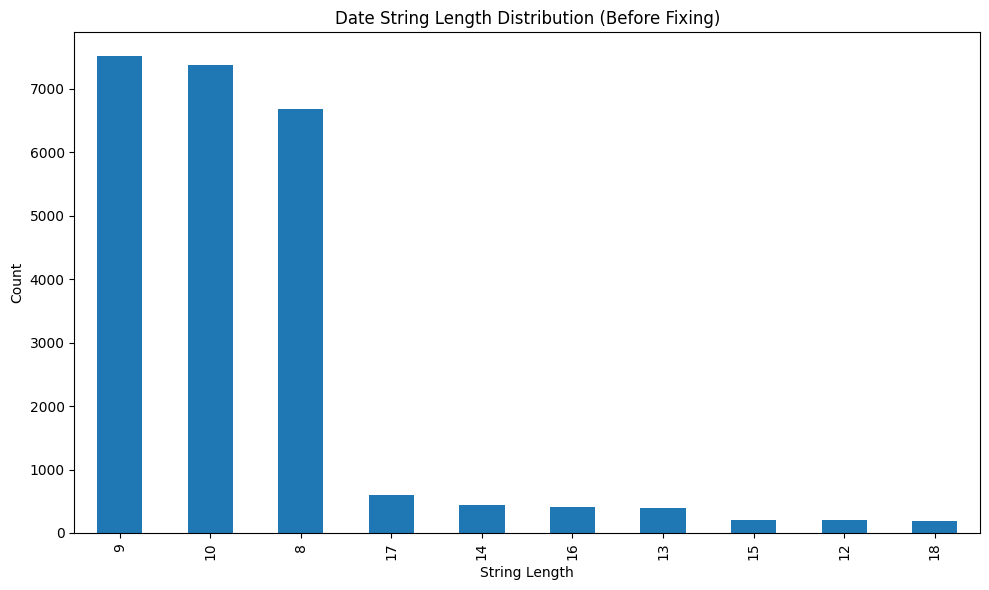


After fixing, Date data types:
Date
<class 'float'>    19227
<class 'str'>       4800
Name: count, dtype: int64

Sample of fixed Date values:
15673           NaN
1486     2023-08-28
14109           NaN
6033            NaN
17490           NaN
18681           NaN
10615    2023-12-14
14582           NaN
14663           NaN
16323           NaN
Name: Date, dtype: object


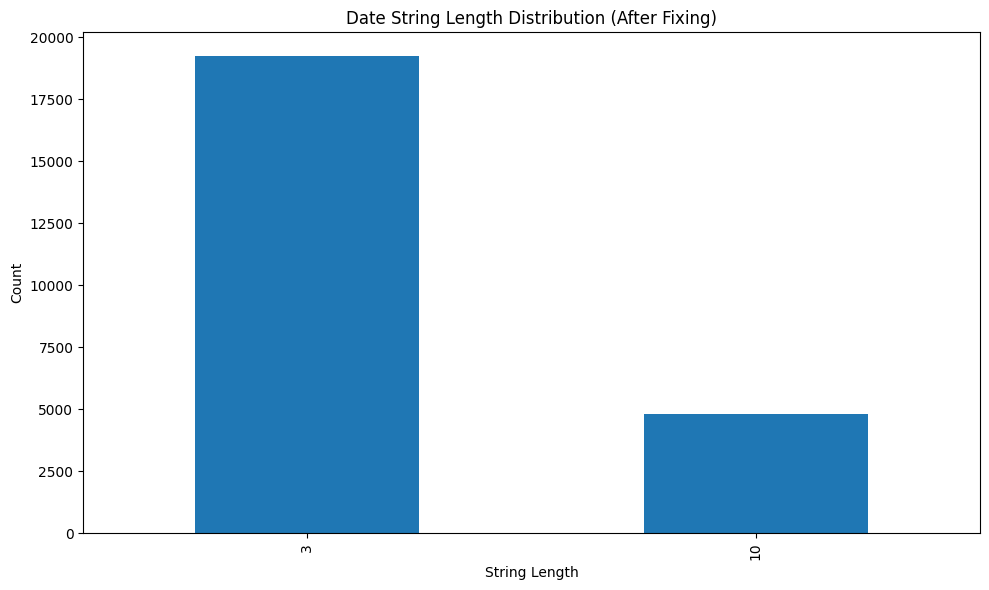


6. Final Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24027 entries, 0 to 24026
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   State    24027 non-null  object 
 1   Country  24027 non-null  object 
 2   Age      24027 non-null  float64
 3   Date     4800 non-null   object 
dtypes: float64(1), object(3)
memory usage: 751.0+ KB
None

Missing values:
State          0
Country        0
Age            0
Date       19227
dtype: int64

Inconsistencies fixed. The dataset is now clean and consistent.


In [5]:


# Assume df is our inconsistent dataset
# df = df_inconsistent.copy()

def analyze_and_fix(df):
    print("1. Initial Data Overview")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    
    # State Analysis and Fix
    print("\n2. State Analysis")
    print("Unique State values:", df['State'].nunique())
    print("\nSample of State values:")
    print(df['State'].sample(10))
    
    # Visualization for State
    plt.figure(figsize=(12, 6))
    df['State'].value_counts().head(20).plot(kind='bar')
    plt.title('Top 20 States (Before Fixing)')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Fix State
    df['State'] = df['State'].str.strip().str.title()
    print("\nAfter fixing, unique State values:", df['State'].nunique())
    print("\nSample of fixed State values:")
    print(df['State'].sample(10))
    
    # Visualization for fixed State
    plt.figure(figsize=(12, 6))
    df['State'].value_counts().head(20).plot(kind='bar')
    plt.title('Top 20 States (After Fixing)')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Country Analysis and Fix
    print("\n3. Country Analysis")
    print("Unique Country values:", df['Country'].nunique())
    print("\nSample of Country values:")
    print(df['Country'].sample(10))
    
    # Visualization for Country
    plt.figure(figsize=(10, 6))
    df['Country'].value_counts().plot(kind='bar')
    plt.title('Country Distribution (Before Fixing)')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Fix Country
    df['Country'] = df['Country'].str.strip().str.title()
    print("\nAfter fixing, unique Country values:", df['Country'].nunique())
    print("\nSample of fixed Country values:")
    print(df['Country'].sample(10))
    
    # Visualization for fixed Country
    plt.figure(figsize=(10, 6))
    df['Country'].value_counts().plot(kind='bar')
    plt.title('Country Distribution (After Fixing)')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Age Analysis and Fix
    print("\n4. Age Analysis")
    print("Age data types:")
    print(df['Age'].apply(type).value_counts())
    print("\nSample of Age values:")
    print(df['Age'].sample(10))
    
    # Age Analysis and Fix
    print("\n4. Age Analysis")
    print("Age data types:")
    print(df['Age'].apply(type).value_counts())
    print("\nSample of Age values:")
    print(df['Age'].sample(10))

    # Visualization for Age (before fixing)
    plt.figure(figsize=(10, 6))
    df['Age'].astype(str).value_counts().sort_index().plot(kind='bar')
    plt.title('Age Distribution (Before Fixing)')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Fix Age
    def clean_age(age):
        if isinstance(age, str):
            return float(age.replace(' years', ''))
        elif pd.isna(age):
            return np.nan
        return float(age)

    df['Age'] = df['Age'].apply(clean_age)
    print("\nAfter fixing, Age data types:")
    print(df['Age'].apply(type).value_counts())
    print("\nSample of fixed Age values:")
    print(df['Age'].sample(10))

    # Visualization for fixed Age
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'].dropna(), kde=True, bins=30)
    plt.title('Age Distribution (After Fixing)')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

    # Age statistics
    print("\nAge statistics:")
    print(df['Age'].describe())
    
    # Date Analysis and Fix
    print("\n5. Date Analysis")
    print("Date data types:")
    print(df['Date'].apply(type).value_counts())
    print("\nSample of Date values:")
    print(df['Date'].sample(10))
    
    # Visualization for Date
    plt.figure(figsize=(10, 6))
    df['Date'].apply(lambda x: len(str(x))).value_counts().plot(kind='bar')
    plt.title('Date String Length Distribution (Before Fixing)')
    plt.xlabel('String Length')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    df['Date'] = df['Date'].apply(standardize_date)
    print("\nAfter fixing, Date data types:")
    print(df['Date'].apply(type).value_counts())
    print("\nSample of fixed Date values:")
    print(df['Date'].sample(10))
    
    # Visualization for fixed Date
    plt.figure(figsize=(10, 6))
    df['Date'].apply(lambda x: len(str(x))).value_counts().plot(kind='bar')
    plt.title('Date String Length Distribution (After Fixing)')
    plt.xlabel('String Length')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Final Overview
    print("\n6. Final Data Overview")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    
    return df

# Run the analysis and fix
df_fixed = analyze_and_fix(df)
print("\nInconsistencies fixed. The dataset is now clean and consistent.")